<p style="text-align:center">
    <a href="https://rofer.org/">
    <img src="https://rofer.org/wp-content/uploads/2022/09/analytics.png" width="200" alt="Machine Learning Mobile Price Prediction"  />
    </a>
</p>

# <font color="blue"><center>www.rofer.org</center>
## <font color="blue"><center>DIGITAL & DATA ENTHUSIAST</center></font>

# Using Seaborn to identify and plot relationship between data features of Shopee Data


# Project Context

## Does having volume of reviews in Shopee matter? does it correlated to volume of products sold?

My work process flow

*   Using shopee data, we extracted the product page individual urls, average ratings, ratings volume, sold/purchase volume and price
*   Using seaborn library and matplotlib we plotted if there is a direct relationship between sold items versus other features such as average ratings, ratings volume or price
*   This is just a simple demonstration of how to propose to business on why having a volume of ratings and review is important to perform well in e-retailers.

    
<center>
    <img src="https://rofer.org/wp-content/uploads/2024/06/shopee_screenshot.png" width="500" alt="Machine Learning Mobile Price Prediction"  />
</center>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 100)
df = pd.read_csv("shopee_data.csv")
df.shape

(61, 6)

In [26]:
df.head(61)

,link,rating,ratings_volume,sold,price,product
0,https://shopee.sg/Samsung-Galaxy-Z-Flip5-5G-1-Year-Local-shop-Warranty-%E3%80%90SEALED-SET-AND-D...,4.8,28,64,1049,flip5
1,https://shopee.sg/Samsung-Galaxy-Z-Flip4-5G-LOCAL-6-months-Local-Seller-Warranty-Display-Sealed-...,4.6,22,64,680,flip4
2,https://shopee.sg/-Second-Hand-Samsung-Galaxy-Z-Flip-4-Excellent-i.1054387533.25415405963?sp_atk...,5.0,5,8,439,flip4
3,https://shopee.sg/-2023-Samsung-galaxy-Z-flip-5-Snapdragon-8-Gen-1-local-local-months-warranty-s...,4.9,117,211,969,flip5
4,https://shopee.sg/-Original-Samsung-Galaxy-Z-Flip-5-Snapdragon-8-Gen-2-Local-warranty-i.29277566...,4.9,29,63,990,flip5
...,...,...,...,...,...,...
56,https://shopee.sg/Samsung-Galaxy-S23-5G-256GB-512GB-1-Year-Local-Warranty-Sealed-Set-DISPLAY-SET...,4.5,4,8,781,S23
57,https://shopee.sg/Samsung-Galaxy-S23-Ultra-Samsung-Galaxy-S23-Samsung-Galaxy-S23Ultra-Snapdragon...,4.8,104,219,730,S23
58,https://shopee.sg/Samsung-Galaxy-S24-5G-S23-5G-128GB-256GB-512GB-1-Year-Samsung-Warranty-SG-Loca...,4.8,6,12,848,S24
59,https://shopee.sg/Samsung-Galaxy-S23-FE-5G-1-Year-Samsung-Warranty-Local-SG-i.498332587.17458639...,5.0,14,35,748,S23 FE


In [14]:
df.dtypes

link               object
rating            float64
ratings_volume      int64
sold                int64
price               int64
product            object
dtype: object

In [15]:
df.describe()

,rating,ratings_volume,sold,price
count,61.000000,61.000000,61.000000,61.000000
mean,4.734426,86.229508,204.950820,1052.229508
std,0.736407,255.701023,635.445524,482.452256
min,0.000000,0.000000,1.000000,325.000000
25%,4.800000,3.000000,7.000000,781.000000
50%,4.900000,11.000000,29.000000,950.000000
75%,5.000000,37.000000,90.000000,1189.000000
max,5.000000,1500.000000,3700.000000,3000.000000


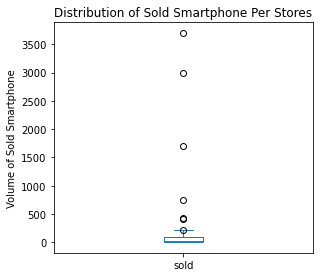

In [16]:
df_mobile_price = df["sold"]

df_mobile_price.plot(kind='box')

plt.title('Distribution of Sold Smartphone Per Stores')
plt.ylabel('Volume of Sold Smartphone')

##plt.show()
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.1, top=0.9)

In [17]:
##remove outliers
df_mobile = df.loc[df["sold"]<1000]
df_mobile.shape

(58, 6)

In [18]:
df_mobile["price"].max()

3000

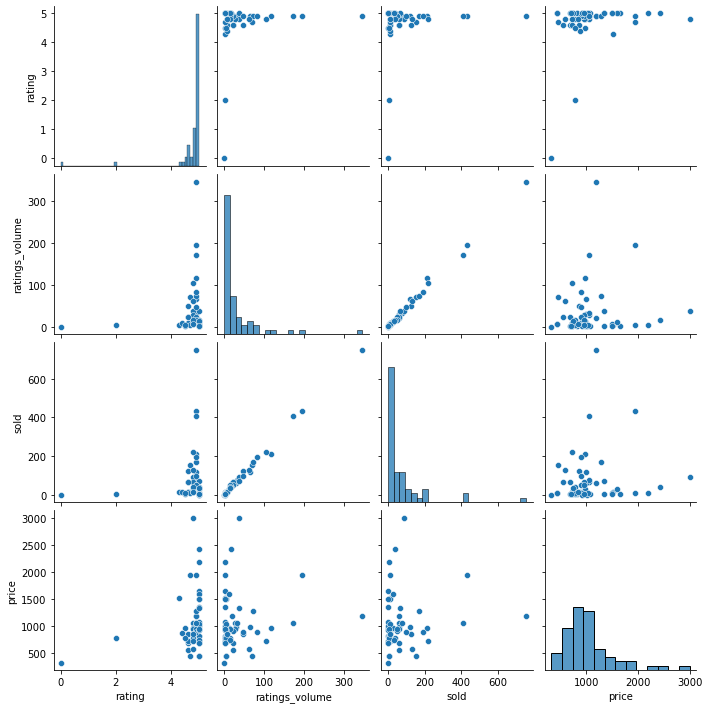

In [19]:
sns.pairplot(data=df_mobile)

(0.0, 834.297159588411)

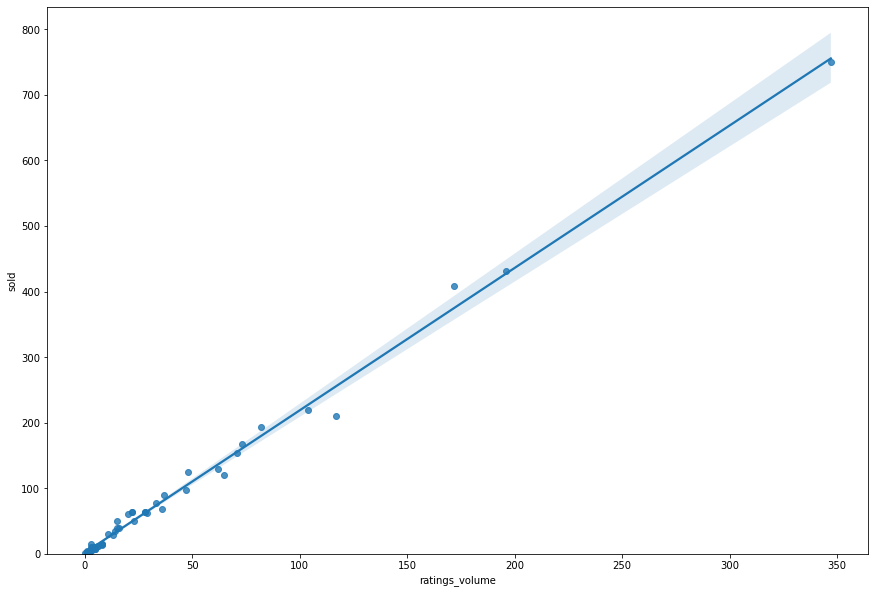

In [24]:
##identifying relationship between ratings_volume and items sold
sns.regplot(x="ratings_volume", y="sold", data=df_mobile)

plt.subplots_adjust(left=0.1, right=2.0, top=2.0, bottom=0.1)

plt.ylim(0)

## Takeaways

Graph shows a direct linear relationship between product ratings volume and items sold in Shopee. Ratings volume is a significant component to drive orders in Shopee regardless of the price of average ratings. Shop owners have to start thinking about campaigns or actions to motivate their buyers to leave a rating and review in order to drive sales. 

No direct relationship between items sold versus average product ratings and price. 

(0.0, 792.5476695934818)

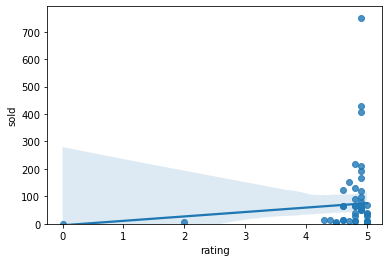

In [21]:
##identifying relationship between average ratings (1-5 stars) and items sold
plt.ylim(0)

(0.0, 787.45)

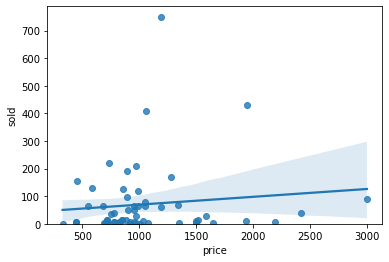

In [22]:
##identifying relationship between item price and items sold
sns.regplot(x="price", y="sold", data=df_mobile)
plt.ylim(0)